Original images
n_samples: 12288
h: 64
w: 64


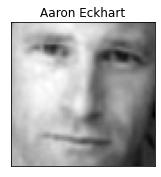

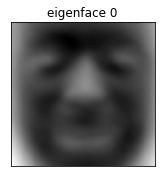

In [267]:
import matplotlib.pyplot as plt
import numpy as np
import os

"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    """
    :param images:
    :param titles:
    :param h:
    :param w:
    :param n_row:
    :param n_col:
    :return:
    """
    """x축 방향으로 2 * n_col, y축 방향으로 2 * n_row 만큼의 크기로 figure 크기 설정(단위 inch)"""
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    """ 그림들의 간격 설정"""
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1)
    """ n_row * n_col 만큼 subplot을 만들어 이미지를 보여준다."""
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()
"""lfwcrop_grey/faces에서 12288개를 읽음"""
dir='lfwcrop_grey/faces'
celebrity_photos=os.listdir(dir)[0:12288]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
print("Original images")
print("n_samples: {}".format(n_samples))
print("h: {}".format(h))
print("w: {}".format(w))
plot_portraits(images, celebrity_names, h, w, n_row=1, n_col=1)

def pca(X, n_pc):
    """Find mean"""
    mean = np.mean(X, axis=0)
    """Center data"""
    centered_data = X - mean
    """SVD"""
    U, S, V = np.linalg.svd(centered_data)
    """Eigenfaces"""
    components = V[:n_pc]

    return components, mean, centered_data

n_components = 1024
X = images.reshape(n_samples, h * w)

"""
C: components(eigenface)
M: mean
Y: centered_data
"""

C, M, Y = pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 1, 1)

"""Coefficients"""
weights = np.dot(Y, C.T)

In [162]:
def reconstruction(Y, C, M, h, w, image_index, weights, X, n_components):

    centered_vector=np.dot(weights[image_index, :], C)

    """plot sum of coefficients"""

    stacked_coefficients = []
    sum = float(0)
    for coefficients in weights[image_index]:
        sum = sum + abs(coefficients)
        #sum = sum + coefficients
        #print(coefficients)
        stacked_coefficients.append(sum)

    x = np.arange(n_components)
    #y = stacked_coefficients / sum * 100
    y = weights[image_index]
    #print(x)
    #print(y)

    plt.scatter(x,y)
    #plt.plot(x,y)

    #plt.show()
    #print(weights[image_index, :])
    recovered_image=(M+centered_vector).reshape(h, w)

    return recovered_image

In [ ]:
recovered_images=[reconstruction(Y, C, M, h, w, i, weights, X, n_components) for i in range(len(images))]
#recovered_images=[reconstruction(Y, C, M, h, w, i, weights, X) for i in range(4)]

plt.grid()
plt.xlabel("Eigenface")
plt.ylabel("Weights sum")

plt.show()

plot_portraits(recovered_images, celebrity_names, h, w, n_row=1, n_col=1)

In [270]:
import random
"""tests에서 100개를 읽음"""
dir='tests'
celebrity_photos=os.listdir(dir)[0:100]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
random.shuffle(celebrity_images)
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape

In [ ]:
print("Original images")
print("n_samples: {}".format(n_samples))
print("h: {}".format(h))
print("w: {}".format(w))
plot_portraits(images, celebrity_names, h, w, n_row=10, n_col=10)

n_components = 1024
X = images.reshape(n_samples, h * w)
print("Xhere")
print(X)

"""
P: projected
C: components(eigenface)
M: mean
Y: centered_data
"""
def findWeights(X, C, M):
    print("mean")
    print(M)
    centered_data = X - M
    print("centered_data")
    print(centered_data)
    print("C.T")
    print(C.T)
    weights = np.dot(centered_data, C.T)
    return weights

weights = findWeights(X, C, M)
print("weights")
print(weights)
print(weights.shape)

"""mean weights"""
weights_mean = []
for k in range(10):
    weights_mean.append(weights[k : k + 10].mean(axis=0))
    k = k + 10
print("weights_mean")
for mean in weights_mean:
    print(mean)

"""distance of weights"""
"""
for idx in range(10):
    print("distance is")
    print(np.linalg.norm(weights[idx] - weights_mean[idx]))
"""

In [214]:
def cos_sim(A, B):
       return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

for i in range(10):
    dist = []
    for j in range(10):
        dist.append(cos_sim(weights[j + 10 * i], weights_mean[i]))
    dist = np.array(dist)
    print(dist.mean())


print("cosine similarity between myself is ")
for i in range(10):
    for j in range(i, 10):
        print(cos_sim(weights[i][1:10],weights[j][1:10]))

0.4880847790716739
0.2561885569623662
0.33905731354510144
0.1197616292103603
0.2989728424868553
0.20831025135428116
0.3670412385798769
0.3669702321619827
0.14040554224529972
0.30621606586415484
cosine similarity between myself is 
1.0
0.7720211950234807
-0.17744793270826872
0.062004288365193616
0.7436288617918789
0.49529360592747074
0.5007848692049289
0.5954762782124113
0.520281043632161
0.4199977432158253
1.0
0.06832737055456692
0.28754584853282417
0.7266407194335045
0.1459422607981245
0.6891924217898607
0.2981173449914206
0.40575021372810205
0.0914720337623351
1.0
0.9572608666261616
-0.17313892508366435
-0.6490343428216013
0.54770046412917
-0.018955494759010764
-0.23707776461818647
-0.9420130514523157
0.9999999999999998
-0.051782763317398235
-0.5565965116402058
0.6686105480079129
0.08450935234662081
-0.19980401151245442
-0.8596353044675723
1.0
0.20895392158843998
0.6388477945648112
0.673693916760933
0.7398104093686879
0.3623529462786078
1.0
-0.3076226385220776
0.0904468854115565
0.48

cosine similarity is 1.0 at following points
[413]
[689]
[272, 442]
[12, 48, 945]
[567, 974]
[]
[34, 104, 167, 527, 879]
[8, 862]
[]
[513]


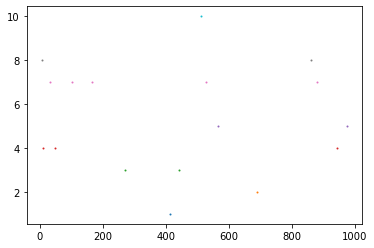

,0,1,2,3,4
0,413.0,NaN,NaN,NaN,NaN
1,689.0,NaN,NaN,NaN,NaN
2,272.0,442.0,NaN,NaN,NaN
3,12.0,48.0,945.0,NaN,NaN
4,567.0,974.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,34.0,104.0,167.0,527.0,879.0
7,8.0,862.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,513.0,NaN,NaN,NaN,NaN


In [269]:
import pandas as pd
start = 0
maximum_similarity = 0.0
step = range(0,100,10)
unique_weight_point = []
for k in step:
    slice_point = []
    for slice_start in range(1024 - 1):
        l = []
        for i in range(k,k+10):
            for j in range(i + 1, k+10):
                l.append(cos_sim(weights[i][slice_start:slice_start + 1],weights[j][slice_start:slice_start+1]))
        l = np.array(l)
        if(l.mean() > 0.9):
            #print("cosine similarity is 1.0 if slice at {}".format(slice_start))
            slice_point.append(slice_start)
            """
            print("from")
            print(start)
            print("to")
            print(start + 1)
            print("cosine similarity is ")
            print(l.mean())
            """
    unique_weight_point.append(slice_point)
print("cosine similarity is 1.0 at following points")
i = 1
for points_by_person in unique_weight_point:
    y = []
    for l in range(len(points_by_person)):
        y.append(i)
    plt.scatter(points_by_person, y, s=1)
    print(points_by_person)
    i = i + 1

plt.show()

pd.DataFrame(unique_weight_point)

In [ ]:
"""
안야 테일러조이는 idx=7의 weights의 cosine similarity를 본다.
"""


In [246]:
l = []
for i in range(10):
            for j in range(i + 1, 10):
                l.append(cos_sim(weights[i][7:8],weights[j][7:8]))
print("weights[0][7]")
print(weights[0][7])
print(weights[1][7])
print(cos_sim(weights[0][9], weights[1][9]))
print(l)
l = np.array(l)
print(l.mean())


weights[0][7]
646.9263033334136
1026.0449339304123
1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [ ]:
print("cosine similarity between 1 and others is ")
for i in range(10):
    if(i == 1):
        continue
    else:
        print(cos_sim(weights[i],weights_mean[1]))

In [ ]:
"""reconstruction"""
"""
recovered_images = []
for i in range(len(images)):
    recovered_images.append(reconstruction(Y, C, M, h, w, i, weights, X, n_components))
"""
recovered_images=[reconstruction(Y, C, M, h, w, i, weights, X, n_components) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=10, n_col=10)
